In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
df=pd.read_csv('weight_height_data.csv')

In [5]:
df.head()

,Weight_kg,Height_cm
0,40,140
1,43,139
2,46,141
3,49,153
4,52,152


Text(0, 0.5, 'Height')

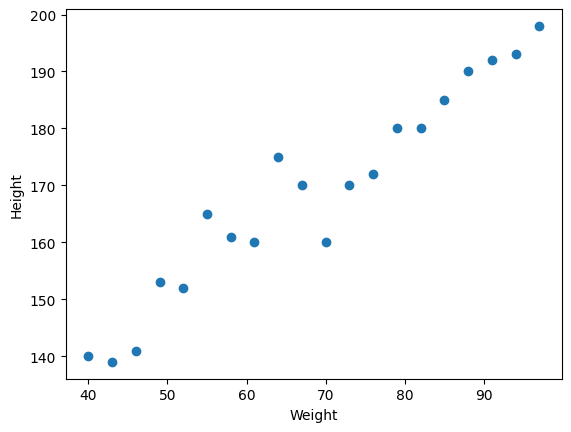

In [6]:
### scatter plot
plt.scatter(df['Weight_kg'],df['Height_cm'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [7]:
## finding correlation 
df.corr()

,Weight_kg,Height_cm
Weight_kg,1.000000,0.964871
Height_cm,0.964871,1.000000


In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


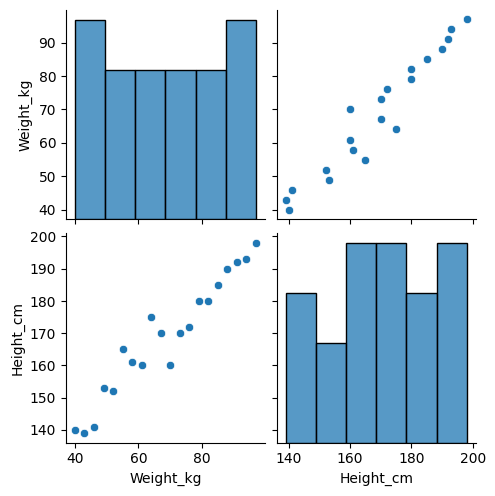

In [9]:
## seaborn for visualization
import seaborn as sns 
sns.pairplot(df)

In [12]:
## Independent and Dependent featres
X=df[['Weight_kg']] ## independent features should be in data frame or 2-d 
np.array(X).shape
Y=df['Height_cm'] # dependent/ variable should be in series or 1d array

In [11]:
X.head()

,Weight_kg
0,40
1,43
2,46
3,49
4,52


In [15]:
Y

0     140
1     139
2     141
3     153
4     152
5     165
6     161
7     160
8     175
9     170
10    160
11    170
12    172
13    180
14    180
15    185
16    190
17    192
18    193
19    198
Name: Height_cm, dtype: int64

In [16]:
np.array(Y).shape

(20,)

In [21]:
##  Train Test Split
from sklearn.model_selection import train_test_split         

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [24]:
X_train.shape

(15, 1)

In [ ]:
## Standardization , it means u = 0 and sigma = 1 (normalizee)
from sklearn.preprocessing import StandardScaler

In [27]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [28]:
X_test=scaler.transform(X_test)

In [29]:
X_test

array([[-1.89781971],
       [ 1.35012678],
       [ 0.96801542],
       [-1.70676404],
       [-0.36937431]])

In [30]:
## Apply Simple Linear Regression 
from sklearn.linear_model import LinearRegression

In [32]:
regression=LinearRegression(n_jobs=-1)

In [33]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [35]:
print("Coefficient or slope :",regression.coef_)

Coefficient or slope : [15.02546748]


In [37]:
print("Intercept :",regression.intercept_)

Intercept : 169.66666666666666


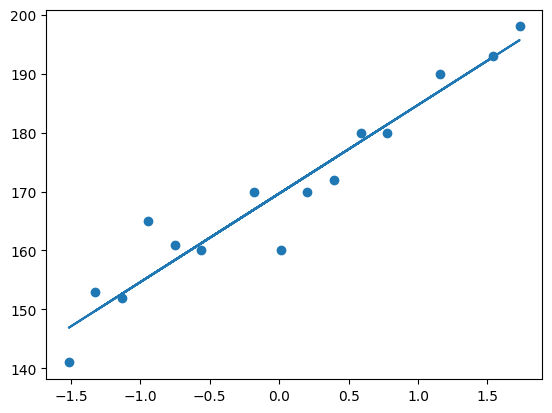

In [41]:
## plot training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))

### prediction of test data 
1. predicted height output = intercept + slope(X_test)
2. Y_pred=169.66 + 15.02(X_test)

In [42]:
## prediction for test data
y_pred=regression.predict(X_test)

In [45]:
# Performance metrices
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [48]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

29.96044463445827
3.978325762491886
5.473613489684696


# R^2 Square
R^2 = 1 -SSR/SST
ssr = sum of squres of residuals
sst = total sum of squares



In [ ]:
from sklearn.metrics import r2_score

In [50]:
score=r2_score(Y_test,y_pred)
print(score)

0.9406206503994405


## adjusted r^2 Square 
adjusted R2 = 1- [(1-r2)*(n-1)/(n-k-1)]

In [51]:
1 -(1-score)*(len(Y_test-1))/(len(Y_test)-X_test.shape[1]-1)

0.9010344173324009

## Ordinary Least Square (OLS)

In [ ]:
pip install statsmodels

In [58]:
## ols linear regression
import statsmodels.api as sm

In [59]:
model=sm.OLS(Y_train,X_train).fit()

In [60]:
prediction=model.predict(X_test)
print(prediction)

[-28.51562838  20.28628596  14.54488427 -25.64492754  -5.55002163]


In [61]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:              Height_cm   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.063
Method:                 Least Squares   F-statistic:                             0.1097
Date:                Mon, 19 May 2025   Prob (F-statistic):                       0.745
Time:                        20:56:49   Log-Likelihood:                         -98.297
No. Observations:                  15   AIC:                                      198.6
Df Residuals:                      14   BIC:                                      199.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\arjun\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [2]:
## prediction for new data
regression.predict(scaler.transform([[72]]))

NameError: name 'regression' is not defined